# Implementation of clustering algorithms

Build K-Means and Agglomerative Clustering models to perform an unsupervised clustering by using given data. Follow below steps as a guideline for building your model and explain each of them in code lines. 

* Data cleaning (25 points)

Start with data cleaning to ensure that your data is correct, consistent and usable. The techniques used for data cleaning may vary but you can consider to follow these basic steps: handling missing values, encoding categorical features, extracting useful features by using existing features, handling outliers etc.

* Data Preprocessing (25 points)

In this step you should transform raw data into an understandable format for machine learning algorithms. This step may include scaling the features, performing dimensionality reduction etc.

* Clustering (30)

The goal of this step is to find distinct groups or “clusters” within a data set by using K-Means and Agglomerative Clustering Algorithms. Apply Elbow Method to determine the number of clusters. After building models, examine and comment the clusters formed via scatter plot.

* Silhouette Scores (20)

To evaluate how “well clustered” data points are, use the “silhouette score” and plot the Silhouette Scores for all of data points.

Note: Don't forget to explain your codes and comment on the obtained result.

                                           -----------Assignment5-----------
### Name : Muhammet Ali                        
### Surname: Şentürk
### ID : 21993073                                     
### Lecture : AIN214
### Due Date : 30/12/2021 14:00
### Grade:100

In [289]:
# Importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [290]:
# Read and print the shape of the data and first 5 rows of it.
data_df_org = pd.read_csv("data.csv")
data_df = data_df_org.copy()
print("Shape of the data is: {}".format(data_df.shape))
data_df.drop(["Unnamed: 0"], axis=1, inplace=True)
data_df.head()

Shape of the data is: (1001, 30)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [291]:
# Detecting the missing(NaN) values.
data_df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 13
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [292]:
# Filling the missing values with the median.
data_df["Income"].fillna(data_df["Income"].median(), inplace=True)

In [293]:
# To see the types of the columns, we have to check this output.
# We are trying to detect the categorical variable and after the one hot encoding process, their type will become integer.
# Why we are doing this? Because when we build our model, the clustering algorithm needs numeric variables.
data_df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [294]:
# Printing the value counts(how many of which value) of categorical variables
print("-----------------Education-----------------")
print(data_df["Education"].value_counts())
print("----------------------------------------------")
print("--------------------Marital_Status--------------------")
print(data_df["Marital_Status"].value_counts())
print("----------------------------------------------")
print("-----------------Dt_Customer-----------------")
print(data_df["Dt_Customer"].value_counts())
print("----------------------------------------------")

-----------------Education-----------------
Graduation    504
PhD           226
Master        163
2n Cycle       90
Basic          18
Name: Education, dtype: int64
----------------------------------------------
--------------------Marital_Status--------------------
Married     373
Together    255
Single      222
Divorced    111
Widow        37
Alone         3
Name: Marital_Status, dtype: int64
----------------------------------------------
-----------------Dt_Customer-----------------
12-09-2012    7
12-05-2014    7
31-08-2012    7
11-05-2013    7
22-05-2014    7
             ..
02-02-2013    1
04-09-2012    1
27-05-2013    1
22-11-2012    1
22-03-2014    1
Name: Dt_Customer, Length: 516, dtype: int64
----------------------------------------------


In [295]:
# Looking for the unique values of Dt_Customer variable. Because it seems like there are so many unique values.
len(data_df["Dt_Customer"].unique())

516

In [296]:
# Yes we guessed it right. We have to get rid of this variable since we could not process one hot encoding for it.
data_df.drop(["Dt_Customer"], axis=1, inplace=True)

# We have to drop ID column as well because we do not need to consider when we build a cluster model.
data_df.drop(["ID"], axis=1, inplace=True)

In [297]:
# One hot encoding processed to categorical variables and concatenate with our data_df.
# By the way, we need to delete original categorical variable since we do not need them anymore.
educationLabel = pd.get_dummies(data_df["Education"], prefix="Education")
marital_statusLabel = pd.get_dummies(data_df["Marital_Status"], prefix="Marital_Status")
one_hot_data_df = pd.concat([data_df, educationLabel, marital_statusLabel], axis=1)
one_hot_data_df.drop(["Education", "Marital_Status"], axis=1, inplace=True)
one_hot_data_df.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,1957,58138.0,0,0,58,635,88,546,172,88,...,0,1,0,0,0,0,0,1,0,0
1,1954,46344.0,1,1,38,11,1,6,2,1,...,0,1,0,0,0,0,0,1,0,0
2,1965,71613.0,0,0,26,426,49,127,111,21,...,0,1,0,0,0,0,0,0,1,0
3,1984,26646.0,1,0,26,11,4,20,10,3,...,0,1,0,0,0,0,0,0,1,0
4,1981,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,1,0,0,1,0,0,0


In [298]:
# Now we can set all of the variables' type as integer.
one_hot_data_df = one_hot_data_df.astype("int64")

In [299]:
# So in this step we will scale our data in order to get better results for clustering.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(one_hot_data_df)

# Let's have a look at our data with new appearance
df_scaled = pd.DataFrame(scaled_df,columns=one_hot_data_df.columns)
df_scaled.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,-0.951865,0.259311,-0.813937,-0.874547,0.309087,0.969702,1.580408,1.642666,2.467096,1.467778,...,-0.135319,0.993031,-0.441034,-0.540012,-0.054827,-0.353156,-0.770681,1.873235,-0.584656,-0.195913
1,-1.193779,-0.283501,0.976724,0.934175,-0.384937,-0.877207,-0.623553,-0.725656,-0.661962,-0.644358,...,-0.135319,0.993031,-0.441034,-0.540012,-0.054827,-0.353156,-0.770681,1.873235,-0.584656,-0.195913
2,-0.306762,0.879490,-0.813937,-0.874547,-0.801351,0.351106,0.592425,-0.194977,1.344316,-0.158810,...,-0.135319,0.993031,-0.441034,-0.540012,-0.054827,-0.353156,-0.770681,-0.533836,1.710406,-0.195913
3,1.225357,-1.190091,0.976724,-0.874547,-0.801351,-0.877207,-0.547555,-0.664255,-0.514712,-0.595803,...,-0.135319,0.993031,-0.441034,-0.540012,-0.054827,-0.353156,-0.770681,-0.533836,1.710406,-0.195913
4,0.983444,0.266445,0.976724,-0.874547,1.558329,-0.397721,0.440428,-0.234449,0.147912,-0.013145,...,-0.135319,-1.007018,-0.441034,1.851811,-0.054827,-0.353156,1.297554,-0.533836,-0.584656,-0.195913


In [300]:
# Dimensionality Reduction Part
# Why we do this? This process will prevent overfitting to a certain extent.
# We will use PCA function
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(scaled_df)

# This output shows how much variance is explained by each of variable
pca.explained_variance_ratio_

array([1.95263421e-01, 6.60008700e-02, 6.18382546e-02, 4.78545808e-02,
       4.58056124e-02, 4.27143657e-02, 3.85748111e-02, 3.58001422e-02,
       3.49289958e-02, 3.39568524e-02, 3.21970402e-02, 3.04999210e-02,
       2.94529404e-02, 2.87571144e-02, 2.73852950e-02, 2.63468998e-02,
       2.41263014e-02, 2.34094612e-02, 2.01120971e-02, 1.84290515e-02,
       1.75951926e-02, 1.66910660e-02, 1.56685646e-02, 1.46724600e-02,
       1.31379153e-02, 1.21105782e-02, 1.10408374e-02, 1.01510101e-02,
       9.19706827e-03, 6.20280024e-03, 5.33933122e-03, 4.73914786e-03,
       3.85089198e-32, 3.29235863e-33, 8.66055721e-34, 5.08262159e-34])

Text(0, 0.5, 'Cumulative Explained Variance')

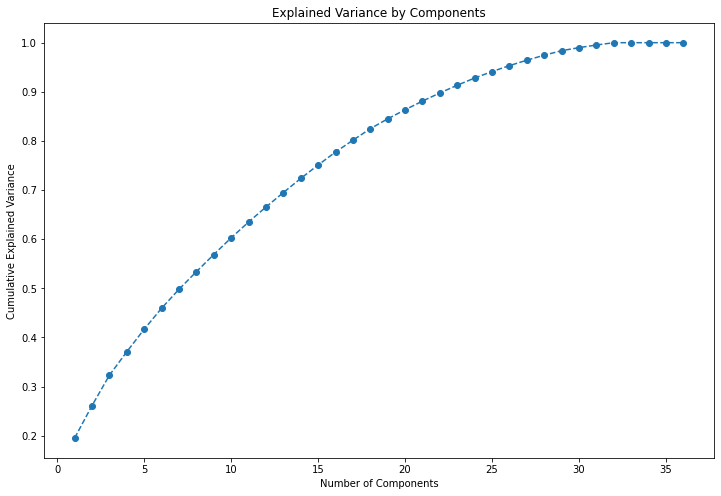

In [301]:
# So let's plot a graph which shows how much vairance is explained with cumulative sum
plt.figure(figsize=(12,8))
plt.plot(range(1,37), pca.explained_variance_ratio_.cumsum(), marker = "o", linestyle = "--")
plt.title("Explained Variance by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

In [302]:
# It might be hard to detect which value is best.
# So we can look at the values with np.array 
cumsumPCA = pca.explained_variance_ratio_.cumsum()
print(cumsumPCA)

[0.19526342 0.26126429 0.32310255 0.37095713 0.41676274 0.4594771
 0.49805192 0.53385206 0.56878105 0.60273791 0.63493495 0.66543487
 0.69488781 0.72364492 0.75103022 0.77737712 0.80150342 0.82491288
 0.84502498 0.86345403 0.88104922 0.89774029 0.91340885 0.92808131
 0.94121923 0.9533298  0.96437064 0.97452165 0.98371872 0.98992152
 0.99526085 1.         1.         1.         1.         1.        ]


In [303]:
# I learned a thumb rule that says "preserve around %80 of the variance".
arr1 = np.where(cumsumPCA > 0.79)
arr2 = np.where(cumsumPCA < 0.81)
np.intersect1d(arr1, arr2)
# So when we look at the output, %80 corresponds to the index 16. So that we will use 17 components.

array([16], dtype=int64)

In [304]:
# This step we perform PCA with the chosen number of components
pca = PCA(n_components=17)
pca.fit(scaled_df)
pca_scores_df = pca.transform(scaled_df)

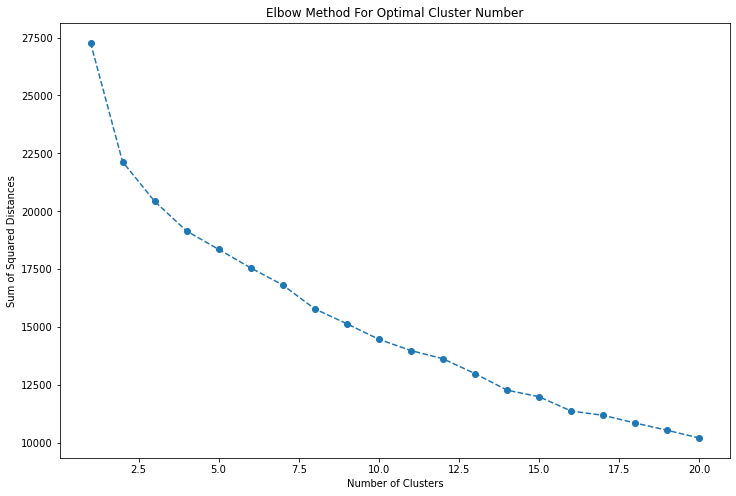

In [305]:
from sklearn.cluster import KMeans
# KMeans modeling for up to 20 clusters 
sum_of_squared_distances = []
number_of_clusters = range(1,21)

# Build kmeans models and storing the sum of squared distances
for k in number_of_clusters:
    km_pca = KMeans(n_clusters=k)
    km_pca = km_pca.fit(pca_scores_df)
    sum_of_squared_distances.append(km_pca.inertia_)

# Elbow method to determine the optimal cluster number
plt.figure(figsize=(12,8))
plt.plot(number_of_clusters, sum_of_squared_distances, marker = "o", linestyle = "--")
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal Cluster Number')
plt.show()

This graph shows that our optimal number of clusters is 2.
- Before 2, line is steeply declining.
- After 2, line is much smooter.
* But we can look at the silhouette scores to prove our result

In [306]:
# Silhouette scores for each cluster number
from sklearn.metrics import silhouette_score

for n in range(2,21):
    kmeans = KMeans (n_clusters=n)
    predictions = kmeans.fit_predict(pca_scores_df)

    s_score = silhouette_score(pca_scores_df, predictions)
    print ("For {} clusters, silhouette score = {:5f}".format(n, s_score))

For 2 clusters, silhouette score = 0.199078
For 3 clusters, silhouette score = 0.134447
For 4 clusters, silhouette score = 0.139833
For 5 clusters, silhouette score = 0.150068
For 6 clusters, silhouette score = 0.118518
For 7 clusters, silhouette score = 0.139097
For 8 clusters, silhouette score = 0.147954
For 9 clusters, silhouette score = 0.144817
For 10 clusters, silhouette score = 0.127172
For 11 clusters, silhouette score = 0.142248
For 12 clusters, silhouette score = 0.149099
For 13 clusters, silhouette score = 0.153423
For 14 clusters, silhouette score = 0.154914
For 15 clusters, silhouette score = 0.152520
For 16 clusters, silhouette score = 0.171720
For 17 clusters, silhouette score = 0.152109
For 18 clusters, silhouette score = 0.176655
For 19 clusters, silhouette score = 0.165707
For 20 clusters, silhouette score = 0.170204


- As we know, silouette score takes a value between -1 and 1.
- While our score getting closer to 1, it proves that our clusters are nicely seperated.
- By looking at these values we can say that 2 clusters gives us the highest score.
- This proves our previous result.

In [307]:
# So we create our final kmeans cluster with 2 clusters
final_kmeans = KMeans(n_clusters=2)
final_kmeans.fit(pca_scores_df)

# Append cluster labels and segment names to the scaled data
df_scaled["KMeans Labels"] = final_kmeans.labels_
df_scaled["Customer Segments"] = df_scaled["KMeans Labels"].map({0:"First Segment", 1:"Second Segment"})
df_scaled.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,KMeans Labels,Customer Segments
0,-0.951865,0.259311,-0.813937,-0.874547,0.309087,0.969702,1.580408,1.642666,2.467096,1.467778,...,-0.441034,-0.540012,-0.054827,-0.353156,-0.770681,1.873235,-0.584656,-0.195913,1,Second Segment
1,-1.193779,-0.283501,0.976724,0.934175,-0.384937,-0.877207,-0.623553,-0.725656,-0.661962,-0.644358,...,-0.441034,-0.540012,-0.054827,-0.353156,-0.770681,1.873235,-0.584656,-0.195913,0,First Segment
2,-0.306762,0.879490,-0.813937,-0.874547,-0.801351,0.351106,0.592425,-0.194977,1.344316,-0.158810,...,-0.441034,-0.540012,-0.054827,-0.353156,-0.770681,-0.533836,1.710406,-0.195913,1,Second Segment
3,1.225357,-1.190091,0.976724,-0.874547,-0.801351,-0.877207,-0.547555,-0.664255,-0.514712,-0.595803,...,-0.441034,-0.540012,-0.054827,-0.353156,-0.770681,-0.533836,1.710406,-0.195913,0,First Segment
4,0.983444,0.266445,0.976724,-0.874547,1.558329,-0.397721,0.440428,-0.234449,0.147912,-0.013145,...,-0.441034,1.851811,-0.054827,-0.353156,1.297554,-0.533836,-0.584656,-0.195913,0,First Segment


In [308]:
# Since we did PCA, we need to add components to the scaled data as well
component_df = pd.concat([df_scaled, pd.DataFrame(pca_scores_df)], axis = 1)
component_df.columns.values[-17: ] = ["Component 1", "Component 2", "Component 3", "Component 4", "Component 5",
                                      "Component 6", "Component 7", "Component 8", "Component 9", "Component 10",
                                      "Component 11", "Component 12" ,"Component 13", "Component 14",
                                      "Component 15", "Component 16", "Component 17"]
component_df.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Component 8,Component 9,Component 10,Component 11,Component 12,Component 13,Component 14,Component 15,Component 16,Component 17
0,-0.951865,0.259311,-0.813937,-0.874547,0.309087,0.969702,1.580408,1.642666,2.467096,1.467778,...,0.024268,-0.653786,-0.195018,0.501595,-0.243200,-0.348718,-0.463375,0.163263,0.699257,0.522448
1,-1.193779,-0.283501,0.976724,0.934175,-0.384937,-0.877207,-0.623553,-0.725656,-0.661962,-0.644358,...,0.726219,-0.415325,-0.399085,0.430622,0.453279,0.107163,-0.568683,-0.063273,-1.156328,0.510153
2,-0.306762,0.879490,-0.813937,-0.874547,-0.801351,0.351106,0.592425,-0.194977,1.344316,-0.158810,...,-0.683240,-0.316461,0.383633,-0.279249,-0.059163,1.441272,-0.573311,-0.271285,-0.078110,-0.937122
3,1.225357,-1.190091,0.976724,-0.874547,-0.801351,-0.877207,-0.547555,-0.664255,-0.514712,-0.595803,...,-0.979676,-0.790969,0.133437,-0.375612,0.402152,0.983201,-0.079822,-0.880421,0.700822,-0.010543
4,0.983444,0.266445,0.976724,-0.874547,1.558329,-0.397721,0.440428,-0.234449,0.147912,-0.013145,...,-1.361697,-0.407479,-0.182668,-0.342632,0.312018,-0.773497,0.870628,-0.089185,1.363908,-0.008061


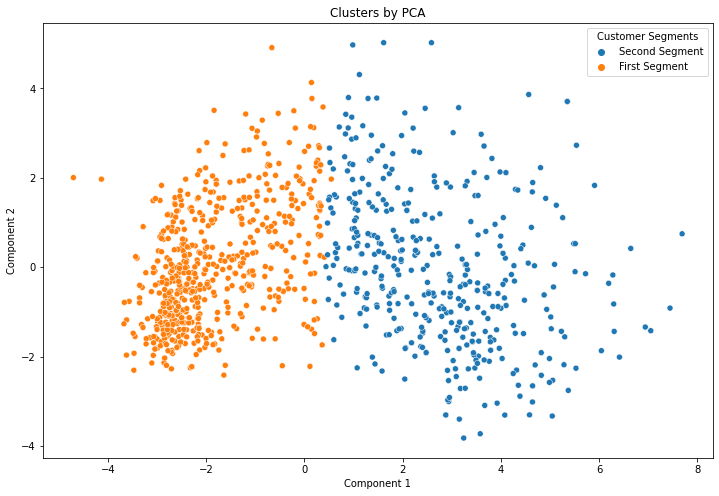

In [309]:
# In order to visualize, we have chose random 2 components and plot the graph
x_axis = component_df["Component 1"]
y_axis = component_df["Component 2"]
plt.figure(figsize=(12,8))
sns.scatterplot(x_axis, y_axis, hue=component_df["Customer Segments"])
plt.title("Clusters by PCA")
plt.show()

It seems like with these 2 components, clustering is very successful. Segments are clearly seperated.

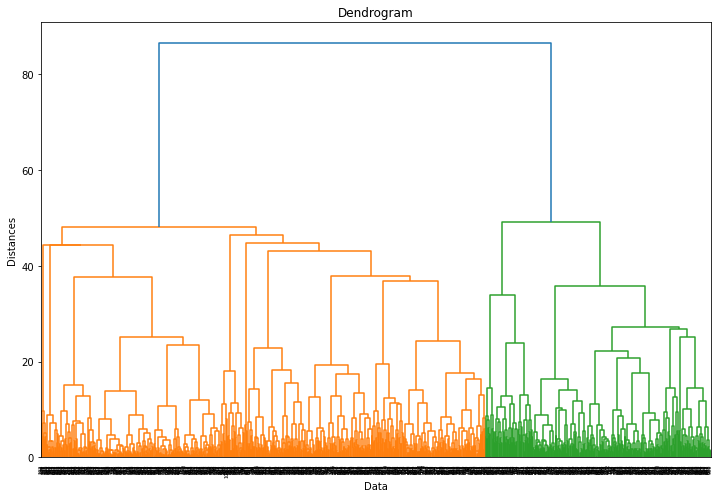

In [310]:
# Agglomerative clustering part
# We need to determine number of cluster by looking at dendogram
# Plotting dendogram takes time (around 5 minutes)
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(12,8))
dendrogram = sch.dendrogram(sch.linkage(pca_scores_df, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Data')
plt.ylabel('Distances')
plt.show()

How we can determine number of clusters?
- We need to look at the longest vertical distance between lines.
- So the blue lines is matching.
- It means that this model will has 2 clusters.

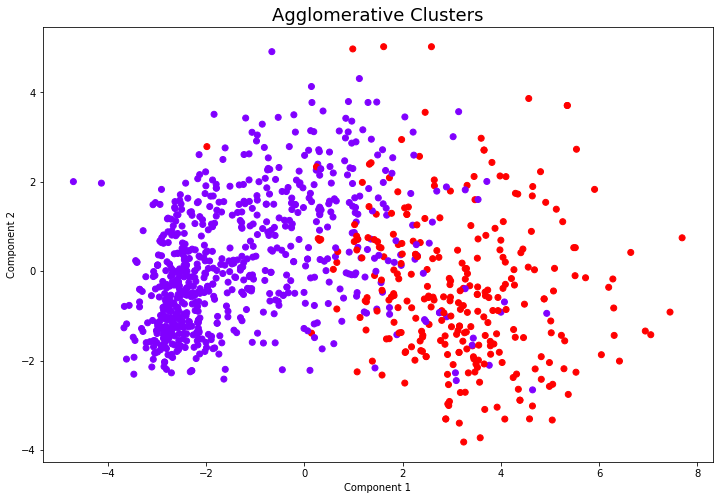

In [311]:
# Finally we can build our model
from sklearn.cluster import AgglomerativeClustering
agl_cluster = AgglomerativeClustering(n_clusters = 2)

# We deleted "Customer Segments" column because it consists categorical values.
component_df.drop(["Customer Segments"], axis=1, inplace=True)

# In order to visualize, we have chose random 2 components and plot the graph
plt.figure(figsize =(12, 8))
plt.scatter(component_df['Component 1'], component_df['Component 2'], c = agl_cluster.fit_predict(component_df), cmap ='rainbow')
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("Agglomerative Clusters", fontsize=18)
plt.show()

Even we have chose same components, kmeans looks like better than this agglomerative clustering
- Clusters are not clearly seperated as far as kmeans model. 
- We can look at the silhouette plot to prove our result.

In [312]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

# This function takes one string parameter
# If kmeans, then plots the kmeans' silhouette plot, agglomerative's silhouette plot otherwise. 
def silhouette_plot(cluster_type, ):
    
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(12, 8)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(component_df) + (2 + 1) * 10])

    if cluster_type == "kmeans":
        clusterer = KMeans(n_clusters=2)
    else:
        clusterer = AgglomerativeClustering(n_clusters=2)
    cluster_labels = clusterer.fit_predict(component_df)

    silhouette_avg = silhouette_score(component_df, cluster_labels)
    print("For n_clusters =",2,"The average silhouette_score is :",silhouette_avg,)
    sample_silhouette_values = silhouette_samples(component_df, cluster_labels)

    y_lower = 10
    for i in range(2):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / 2)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10 

    ax1.set_title("The silhouette plot for {}".format(cluster_type))
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")


For n_clusters = 2 The average silhouette_score is : 0.1863554598180056


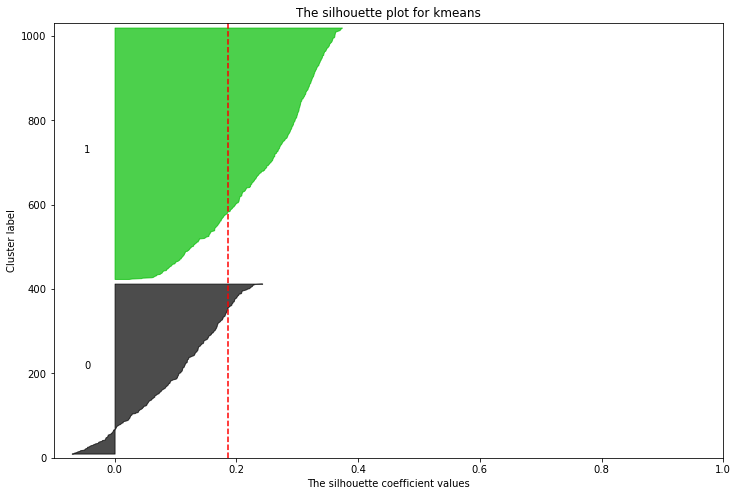

In [313]:
# Silhouette plot for kmeans
silhouette_plot("kmeans")

As we know:
* Points with large silhouette widths are deeply embedded in their cluster.
* Red dotted line shows the average.


- For kmeans we can say that the first segment points(0) are more embedded than the second segment points(1).
- Our average silhouette score is close to 0.2

For n_clusters = 2 The average silhouette_score is : 0.1826219295180756


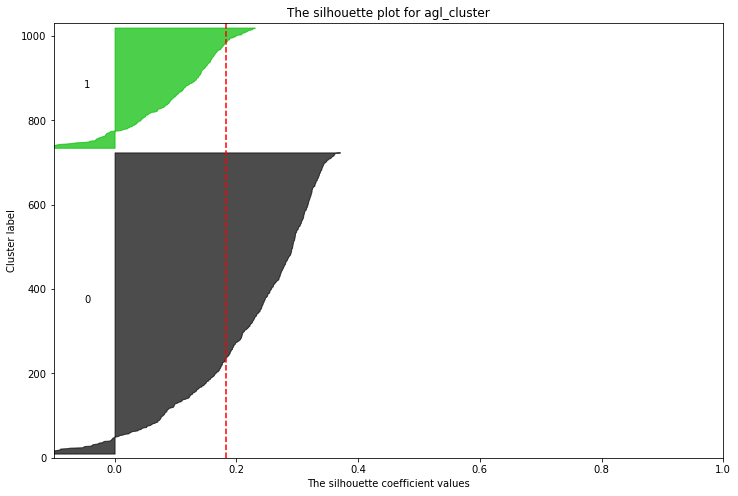

In [314]:
# Silhouette plot for agglomerative clustering
silhouette_plot("agl_cluster")

- For agglomerative clustering things are a bit similar.
- Silhouette width of first segment is larger than the second segment.
- But we compare with kmeans, width of first segment is much larger.

- Average silhouette score close to 0.2 like kmeans.
- But still kmeans has higher score than agl_cluster.
- This shows and proves that kmeans clustering has shown better performance than the agglomerative clustering.